In [47]:
# Import dati dalla prof
from scipy.io import loadmat
import numpy as np
import scipy.linalg as spl
import RisolviSis as RS
import matplotlib.pyplot as plt
dati = loadmat('Approx_C.mat')
A = dati["x"]
B = dati["y"]


### Formula di Lagrange

In [48]:
# Date le coppie (x_i, y_i) che rappresentano dei nodi di interpolazione,
# si definiscono x i nodi e y le valutazioni di un fenoemeno in quei nodi.
# Determinare un polinomio di interpolazione significa innanzitutto determinarne
# i suoi coefficienti, tali che soddisfino la condizione di interpolazione 
# P(x_i) = y_i.
# Successivamente a ciò si potranno determinare dati che stanno sia dentro 
# (interpolazione) che fuori (estrapolazione) dal range dei dati forniti.
# Il polinomio è facilmente rappresentabile come una matrice di Vandermonde,
# che ricordiamo essere molto mal condizionata e quindi soggetta a grossi 
# errori se sottoposta anche a minime perturbazioni, a cui è associato un 
# vettore colonna della valutazione del fenomeno nei nodi.
# In questo caso il sistema lineare ammette una ed una sola soluzione se e 
# solo se la matrice è quadrata ed il rango è massimo. La matrice di Vandermonde 
# ha sempre rango massimo se tutti gli x_i sono distinti, conseguentemente il 
# polinomio interpolatore esiste sempre ed è unico.
# Al crescere del numero dei punti di interpolazione, e quindi del grado del 
# polinomio interpolatore non si ha la convergenza del polinomio interpolatore 
# alla funzione che ha generato i dati: ha al centro dell’intervallo una buona 
# approssimazione e delle fitte oscillazioni agli estremi.
def plagr(x_nodi, k):
    """
    Restituisce i coefficienti del k-esimo pol di
    Lagrange associato ai punti del vettore xnodi
    """
    x_zeri = np.zeros_like(x_nodi)
    n = x_nodi.size
    if k == 0:
        x_zeri = x_nodi[1:n]
    else:
        x_zeri = np.append(x_nodi[0 : k], x_nodi[k + 1 : n])

    num = np.poly(x_zeri)
    den = np.polyval(num, x_nodi[k])

    # Il polinomio interpolatore è unico
    p = num / den

    return p


In [49]:
# Costruisce n+1 polinomi di Lagrange che rappresentano una base per lo spazio
# dei polinomi di grado <= n: ai coeffienti di questi polinomi corrispondono una
# matrice identità e il vettore soluzione.
def InterpL(x, f, xx):
    """
       %funzione che determina in un insieme di punti il valore del polinomio
       %interpolante ottenuto dalla formula di Lagrange.
       % DATI INPUT
       %  x  vettore con i nodi dell'interpolazione
       %  f  vettore con i valori dei nodi 
       %  xx vettore con i punti in cui si vuole calcolare il polinomio
       % DATI OUTPUT
       %  y vettore contenente i valori assunti dal polinomio interpolante
       %
    """
    n = x.size
    m = xx.size
    L = np.zeros((m, n))
    for k in range(n):
        p = plagr(x, k)
        # Il polinomio di Lagrange k-esimo valutato nei punti xx
        # La costante di Lebesgue risulta essere il coefficiente di amplificazione degli errori 
        # relativi sui dati e pertanto identifica il numero di condizionamento del problema 
        # di interpolazione polinomiale
        L[:, k] = np.polyval(p, xx)

    return np.dot(L, f)


### Errori di interpolazione

In [50]:
# L'errore risulta minimo se si scelgono gli x_i come zeri del polinomio di
# Chebichev: all’aumentare del numero dei punti di interpolazione si ha la
# convergenza del polinomio interpolatore alla funzione che ha generato di dati.
# La crescita dell'errore in questo caso é logaritmica anziché esponenziale.
def Cheb(a, b, n):
    t1 = (a + b) / 2
    t2 = (b - a) / 2
    diff = []
    x = np.zeros((n + 1 , ))

    for k in range(n + 1):
        x[k] = t1 + t2 * np.cos(((2 * k + 1) / (2 * (n + 1)) * np.pi))
    return x


### Trend dei dati

Rango  4 Condizionamento  138.04106498526866
residuo  28054.66293085903


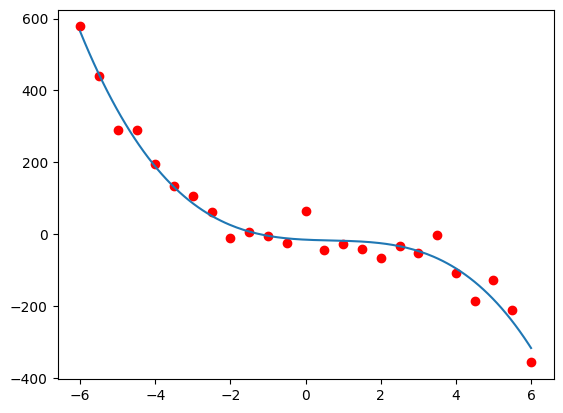

In [51]:
dati = loadmat('Approx_C.mat')
x = dati["x"]
y = dati["y"]
m = x.shape[0]
x = x.reshape(m,)
y = y.reshape(m,)
plt.plot(x, y, 'ro')

# Visualizzando il trend dei dati osservo che hanno un andamento di un polinomio cubico
n = 3
n1 = n + 1
A3 = np.vander(x, increasing=True)[:, :n1]
print('Rango ', np.linalg.matrix_rank(A3),
      'Condizionamento ', np.linalg.cond(A3))
# La matrice A è a rango massimo e mediamente mal condizionata,
# la matrice A^T A, avraà indice di condizionamento il quadrato dell'indice di condizionamento
# di A, per cui uso il metodo QR
alphaqr, res = QRLS(A3, y)
print("residuo ", res)
xx = np.linspace(np.min(x), np.max(x), 200)
polQR = np.polyval(np.flip(alphaqr), xx)
plt.plot(xx, polQR)
